# 1. Logistic Regression
is used for CLASSIFICATION ONLY

It will calculate probabilities by fitting sigmoid curve

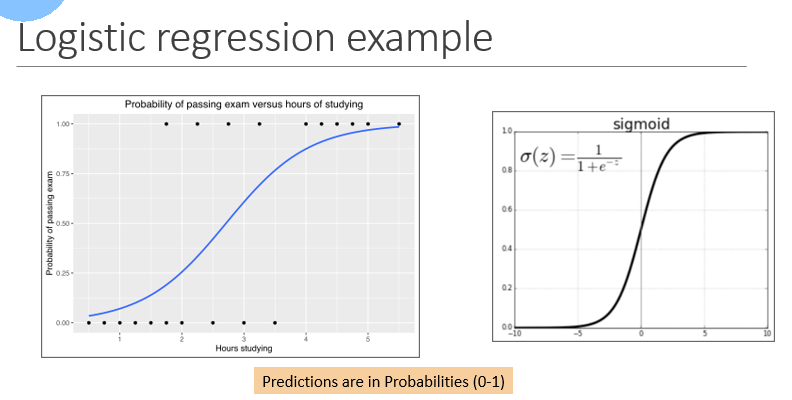

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion
Train Data

In [4]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Target feature - Species which is categorical in nature
### hence it is a classification problem

In [5]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### As number of classes are more than 2 it is a Multiclass classification problem

# Step 2 - Perform Basic Data quality checks

In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
# Remove the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Step 3 - Seperate X and Y(species) feature

In [9]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Step 4 - Apply Preprocessing on X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [16]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


# Step 5 - Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=21
)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [19]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [21]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [22]:
xtrain.shape

(99, 4)

In [23]:
xtest.shape

(50, 4)

# Step 6 - Model Building


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=21)
log_model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
log_model.intercept_

array([-0.19049869,  1.77556317, -1.58506448])

In [26]:
log_model.coef_

array([[-0.92044478,  1.21398442, -1.60769839, -1.59905047],
       [ 0.43056509, -0.4368165 , -0.21171527, -0.76576883],
       [ 0.48987968, -0.77716791,  1.81941365,  2.3648193 ]])

In [27]:
log_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Logistic Regression Model Evaluation

In [28]:
# Train accuracy
log_model.score(xtrain, ytrain)

0.9797979797979798

In [29]:
# Test accuracy
log_model.score(xtest, ytest)

0.92

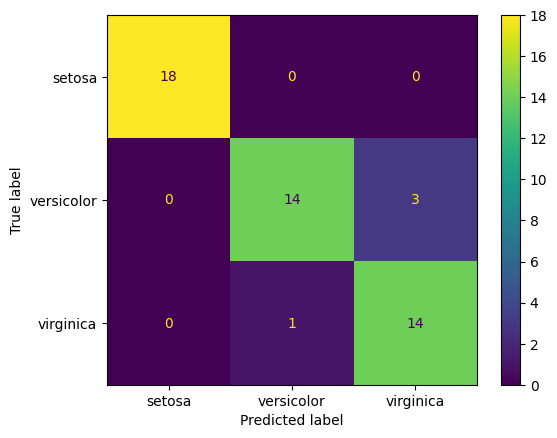

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, xtest, ytest)

In [31]:
ypred_train = log_model.predict(xtrain)
ypred_test = log_model.predict(xtest)

In [32]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [33]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [34]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [35]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [37]:
prob_test = log_model.predict_proba(xtest).round(4)
prob_test[0:5]

array([[0.0196, 0.9182, 0.0622],
       [0.9878, 0.0122, 0.    ],
       [0.9727, 0.0273, 0.    ],
       [0.987 , 0.013 , 0.    ],
       [0.0846, 0.8621, 0.0534]])

In [38]:
log_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.88        17
   virginica       0.82      0.93      0.88        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [41]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average="macro")

0.9166666666666666

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [44]:
scores.mean().round(4)

np.float64(0.9698)

# From above results it is clear this model can be used for out of sample prediction

### Logistic Regression - Out of Sample prediction

In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [48]:
preds = log_model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [49]:
probs = log_model.predict_proba(xnew_pre).round(4)
probs

array([[1.890e-02, 8.853e-01, 9.580e-02],
       [2.000e-04, 5.760e-02, 9.422e-01],
       [1.002e-01, 8.869e-01, 1.290e-02],
       [6.072e-01, 3.923e-01, 4.000e-04],
       [5.800e-03, 3.209e-01, 6.733e-01],
       [9.643e-01, 3.570e-02, 0.000e+00],
       [1.373e-01, 8.244e-01, 3.830e-02],
       [8.000e-04, 1.514e-01, 8.479e-01],
       [9.856e-01, 1.440e-02, 0.000e+00],
       [9.005e-01, 9.920e-02, 3.000e-04],
       [2.250e-02, 8.973e-01, 8.010e-02],
       [2.460e-02, 9.525e-01, 2.290e-02],
       [0.000e+00, 1.660e-02, 9.834e-01],
       [5.600e-03, 6.714e-01, 3.230e-01],
       [5.000e-04, 4.939e-01, 5.056e-01]])

In [50]:
log_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
xnew["species_pred"] = preds
xnew[log_model.classes_] = probs

In [52]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0189,0.8853,0.0958
1,6.9,3.1,5.1,2.3,virginica,0.0002,0.0576,0.9422
2,5.1,2.5,3.0,1.1,versicolor,0.1002,0.8869,0.0129
3,4.4,2.9,NaN,0.2,setosa,0.6072,0.3923,0.0004
4,5.9,3.0,5.1,1.8,virginica,0.0058,0.3209,0.6733
5,5.5,3.5,1.3,0.2,setosa,0.9643,0.0357,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1373,0.8244,0.0383
7,6.5,3.0,5.2,2.0,virginica,0.0008,0.1514,0.8479
8,5.3,3.7,1.5,0.2,setosa,0.9856,0.0144,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9005,0.0992,0.0003


In [53]:
xnew.to_csv("logstic_results.csv", index=False)

# Save model object for Logistic Regression

In [54]:
import joblib

In [55]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [56]:
log_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [58]:
joblib.dump(log_model, "logistic_iris.joblib")

['logistic_iris.joblib']

In [59]:
m = joblib.load("logistic_iris.joblib")
m

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


# 2. Decision Tree Classification

In [61]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [62]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [63]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=3,
    min_samples_leaf=5,
    criterion="entropy",
    random_state=42,
)

model2.fit(xtrain, ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,1
,min_samples_split,3
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
model2.score(xtrain, ytrain)

0.6666666666666666

In [65]:
model2.score(xtest, ytest)

0.66

# Hyperparameter tuning for decision tree

In [66]:
params = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeClassifier(random_state=42)
rscv_dtc = RandomizedSearchCV(
    model, param_distributions=params, cv=5, scoring="f1_macro", random_state=42
)
rscv_dtc.fit(xtrain, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [68]:
rscv_dtc.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'criterion': 'entropy'}

In [69]:
rscv_dtc.best_score_

np.float64(0.9299833499833501)

In [70]:
best_dtc = rscv_dtc.best_estimator_
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,6
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluate the best dtc model

In [71]:
best_dtc.score(xtrain, ytrain)

0.9696969696969697

In [72]:
best_dtc.score(xtest, ytest)

0.94

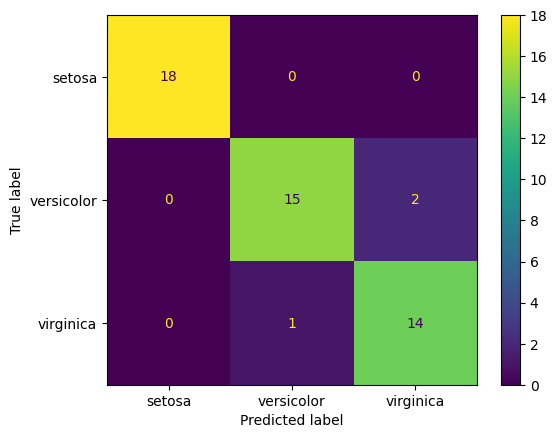

In [73]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [74]:
ypred_test2 = best_dtc.predict(xtest)
ypred_test2[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [75]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [76]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.88      0.91        17
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



# Plot the decision tree

In [77]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [78]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

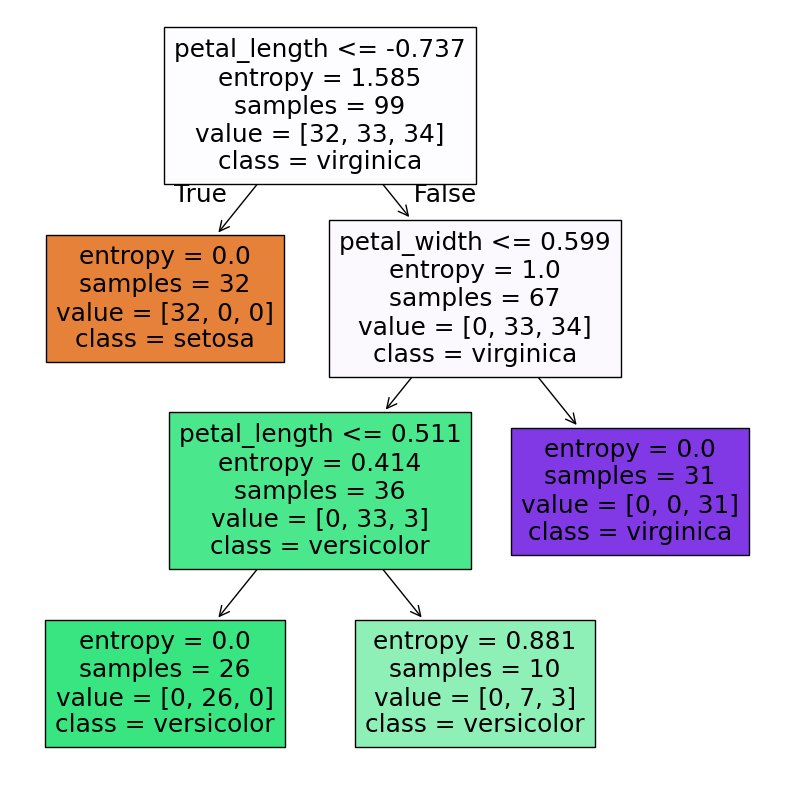

In [83]:
plt.figure(figsize=(10, 10))
plot_tree(
    best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True
)
plt.show()

# Feature imporances for decision tree

In [84]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [85]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.64815813, 0.35184187])

In [86]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

sepal_length    0.000000
sepal_width     0.000000
petal_length    0.648158
petal_width     0.351842
dtype: float64

In [87]:
imp.sort_values(ascending=False)

petal_length    0.648158
petal_width     0.351842
sepal_width     0.000000
sepal_length    0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

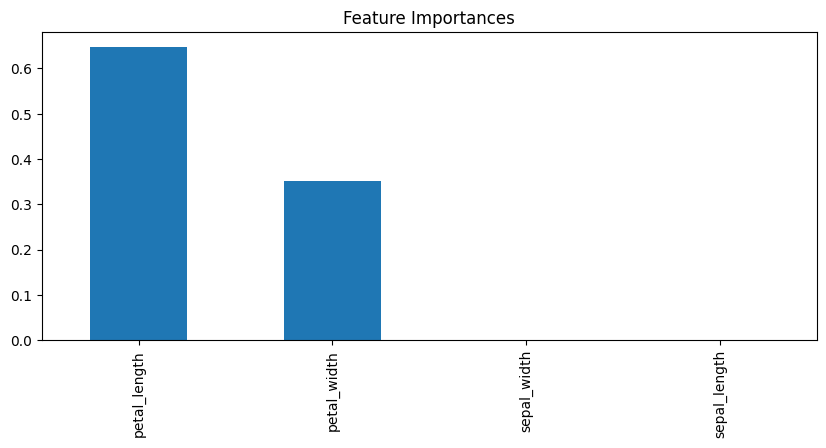

In [89]:
imp.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 4), title="Feature Importances"
)

# Out of sample prediction for decision trees

In [91]:
xnew2 = pd.read_csv("iris_sample.csv")
xnew2

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [92]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [93]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [94]:
preds = best_dtc.predict(xnew2_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [95]:
probs = best_dtc.predict_proba(xnew2_pre).round(4)
probs

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.7, 0.3],
       [0. , 0.7, 0.3]])

In [96]:
xnew2["species_pred"] = preds
xnew2

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,versicolor
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


In [97]:
xnew2[best_dtc.classes_] = probs
xnew2

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,1.0,0.0
1,6.9,3.1,5.1,2.3,virginica,0.0,0.0,1.0
2,5.1,2.5,3.0,1.1,versicolor,0.0,1.0,0.0
3,4.4,2.9,NaN,0.2,versicolor,0.0,1.0,0.0
4,5.9,3.0,5.1,1.8,virginica,0.0,0.0,1.0
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
6,5.6,NaN,3.6,1.3,versicolor,0.0,1.0,0.0
7,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0,0.0


In [98]:
xnew2.to_csv("dtc_results.csv", index=False)

# Save the model object and preprocessor

In [99]:
joblib.dump(best_dtc, "dtc_iris.joblib")

['dtc_iris.joblib']

In [100]:
m2 = joblib.load("dtc_iris.joblib")
m2

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,6
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [101]:
m2.score(xtest, ytest)

0.94

# Tuning Logistic regression model
1. l1 - Lasso
2. l2 - Ridge

In [102]:
params2 = {"penalty": ["l1", "l2"], "C": [0.1, 0.3, 0.5, 0.8, 1]}

In [103]:
model2 = LogisticRegression(random_state=21)

rscv_log = RandomizedSearchCV(
    model2, param_distributions=params2, cv=5, scoring="f1_macro", random_state=42
)
rscv_log.fit(xtrain, ytrain)

,estimator,LogisticRegre...ndom_state=21)
,param_distributions,"{'C': [0.1, 0.3, ...], 'penalty': ['l1', 'l2']}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [104]:
rscv_log.best_params_

{'penalty': 'l2', 'C': 0.8}

In [105]:
rscv_log.best_score_

np.float64(0.9697924297924299)

In [106]:
best_log = rscv_log.best_estimator_
best_log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.8
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


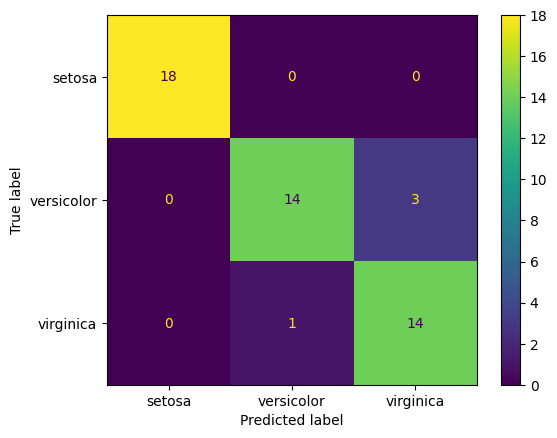

In [107]:
ConfusionMatrixDisplay.from_estimator(best_log, xtest, ytest)